Estimated coefficients:
b_0 = 1.4000000000000004
b_1 = 1.0
Predicted values: [ 1.4  2.4  3.4  4.4  5.4  6.4  7.4  8.4  9.4 10.4]


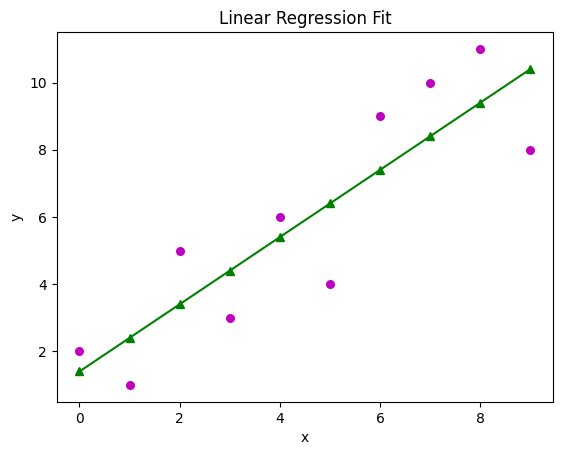

In [1]:
#PROGRAM (Linear regression):
import numpy as np
import matplotlib.pyplot as plt

def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)
    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)
    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y * x) - n * m_y * m_x
    SS_xx = np.sum(x * x) - n * m_x * m_x
    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1 * m_x
    return (b_0, b_1)

def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color="m", marker="o", s=30)
    # predicted response vector 
    y_pred = b[0] + b[1] * x
    print("Predicted values:", y_pred)
    # plotting the regression line
    plt.plot(x, y_pred, marker='^', color="g") 
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Linear Regression Fit')
    plt.show()

def main():
    # observations / data
    x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
    y = np.array([2, 1, 5, 3, 6, 4, 9, 10, 11, 8])
    
    # estimating coefficients
    b = estimate_coef(x, y)
    print("Estimated coefficients:\nb_0 = {}\nb_1 = {}".format(b[0], b[1]))
    
    # plotting regression line
    plot_regression_line(x, y, b)

# Ensure the main function is called when running the script
if __name__ == "__main__":
    main()

In [2]:
from sklearn.linear_model import LinearRegression
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]).reshape((-1, 1))
y = np.array([2, 1, 5, 3, 6, 4, 9, 10, 11, 8])
#x.reshape((-1,1))
print(x.shape)
lr_model=LinearRegression().fit(x,y)
print("Coefficient of Determination i.e. is r-squared value=",lr_model. score(x,y))
print("Linear regression coefficient associated with the predictor variable= ",lr_model.coef_)
print("Linear regression intercept =", lr_model.intercept_)






(10, 1)
Coefficient of Determination i.e. is r-squared value= 0.7575757575757576
Linear regression coefficient associated with the predictor variable=  [1.]
Linear regression intercept = 1.4000000000000004


In [3]:
z=np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
print(z.shape)

(6, 1)


In [ ]:
#Multiple_Linear_Regression_Startups
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
dataset = pd.read_csv('datasets/50_Startups.csv')
dataset.head()
# data preprocessing
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,4]

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
encoder_dense = OneHotEncoder(drop='first', sparse=False)
one_hot_encoded = encoder_dense.fit_transform(X[['State']])
one_hot_encoded_df = pd.DataFrame(one_hot_encoded,
columns=encoder_dense.get_feature_names_out(['State']))
X = pd.concat([X, one_hot_encoded_df], axis=1)
# Drop the original 'Category' column if needed
X.drop('State', axis=1, inplace=True)
print(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 0)
# Fitting the model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
# predicting the test set results
y_pred = regressor.predict(X_test)
y_pred_1 =regressor.predict(X_train)
print(y_test)
print(y_pred)

In [ ]:
#if above not works use this 

In [8]:
# Multiple Linear Regression on Startups Dataset
import numpy as np
import pandas as pd

# Load dataset
dataset = pd.read_csv('datasets/50_Startups.csv')
print(dataset.head())

# Data preprocessing
X = dataset.iloc[:, :-1]  # Independent variables
y = dataset.iloc[:, 4]     # Dependent variable (Profit)

# Encoding categorical data using OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

# Create an instance of OneHotEncoder without the sparse argument
encoder_dense = OneHotEncoder(drop='first')  # drop='first' to avoid the dummy variable trap

# Fit and transform the 'State' column
one_hot_encoded = encoder_dense.fit_transform(X[['State']]).toarray()  # Convert to array to avoid sparse matrix

# Create DataFrame for one-hot encoded variables
one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=encoder_dense.get_feature_names_out(['State']))

# Concatenate the one-hot encoded DataFrame with the original X DataFrame
X = pd.concat([X.reset_index(drop=True), one_hot_encoded_df], axis=1)

# Drop the original 'State' column
X.drop('State', axis=1, inplace=True)
print(X)

# Splitting the dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fitting the model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the test set results
y_pred = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)

# Output results
print("Actual test set results:")
print(y_test.values)
print("\nPredicted test set results:")
print(y_pred)


   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94
    R&D Spend  Administration  Marketing Spend  State_Florida  State_New York
0   165349.20       136897.80        471784.10            0.0             1.0
1   162597.70       151377.59        443898.53            0.0             0.0
2   153441.51       101145.55        407934.54            1.0             0.0
3   144372.41       118671.85        383199.62            0.0             1.0
4   142107.34        91391.77        366168.42            1.0             0.0
5   131876.90        99814.71        362861.36            0.0             1.0
6   134615.46       147198.87        127